In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Initialize the parameters(alpha and beta) to 10 for all distributions because we don't have information
a0_A = 10; b0_A = 10
a0_B = 10; b0_B = 10
a0_C = 10; b0_C = 10

# Create the domain of the posterior function
parameter_domain = np.linspace(0,1,1001)

# Create the beta distributions with initialized parameters
dist_A = stats.beta(a = a0_A, b = b0_A).pdf(parameter_domain); dist_B = stats.beta(a = a0_B, b = b0_B).pdf(parameter_domain); dist_C = stats.beta(a = a0_C, b = b0_C).pdf(parameter_domain)

# Find the probability that gives the highest pdf in the distribution; they should be the same before simulation.
prob_A = parameter_domain[np.argmax(dist_A)]
prob_B = parameter_domain[np.argmax(dist_B)]
prob_C = parameter_domain[np.argmax(dist_C)]
probs = [prob_A, prob_B, prob_C]
print(probs)

[0.5, 0.5, 0.5]


In [3]:
# Initialize the probabilities for each of three distribution
p0_A = 0.2; p0_B = 0.5; p0_C = 0.7

# probs_list keeps track of the updated probabilities of the distributions
probs_list = []
probs_list.append(probs)

# prob_A_diff is the absolute value of the difference between the latest and the second latest updated probability of posterior A
# Initialize prob_A_diff, prob_B_diff, and prob_C_diff to 0 before start simulation.
prob_A_diff = 0; prob_B_diff = 0; prob_C_diff = 0

# Set the number of success and number of simulations to 0 for all distributions.
x_A = 0; x_B = 0; x_C = 0
n_A = 0; n_B = 0; n_C = 0

# iteration is to keep track of the number of choices made to decide what distribution to simulate (play "game")
iteration = 0

In [4]:
# Stop the simulation when the updates of all probabilities of distributions are not significant (< 0.01)
while len(probs_list) < 2 or (prob_A_diff > 0.01 or prob_B_diff > 0.01 or prob_C_diff > 0.01):
    
    iteration += 1
    
    # Pick which distribution to simulate.
    if (prob_A != prob_B) or (prob_A != prob_C) or (prob_B != prob_C):
        pick = random.choices(["A", "B", "C"], weights = [prob_A, prob_B, prob_C])[0]
    else:
        pick = "ABC"

    print(pick)  

    if "A" in pick:
        n_A += 1
        if stats.binom(n=1, p=p0_A).rvs(size=1) == 1:
            x_A += 1

    if "B" in pick:
        n_B += 1
        if stats.binom(n=1, p=p0_B).rvs(size=1) == 1:
            x_B += 1

    if "C" in pick:
        n_C += 1
        if stats.binom(n=1, p=p0_C).rvs(size=1) == 1:
            x_C += 1

    # Update the posterior
    a_A = a0_A + x_A; b_A = b0_A + (n_A - x_A)
    dist_A = stats.beta(a = a_A, b = b_A).pdf(parameter_domain)
    prob_A = parameter_domain[np.argmax(dist_A)]

    a_B = a0_B + x_B; b_B = b0_B + (n_B - x_B)
    dist_B = stats.beta(a = a_B, b = b_B).pdf(parameter_domain)
    prob_B = parameter_domain[np.argmax(dist_B)]

    a_C = a0_C + x_C; b_C = b0_C + (n_C - x_C)
    dist_C = stats.beta(a = a_C, b = b_C).pdf(parameter_domain)
    prob_C = parameter_domain[np.argmax(dist_C)]


    probs = [prob_A, prob_B, prob_C]
    probs_list.append(probs)
    print(x_A, x_B, x_C)
    print(probs)
    print(a_A, b_A, a_B, b_B, a_C, b_C)
    
    # Calculate how much the probabilities were updated.
    if len(probs_list) >= 2:
        prob_A_diff = abs(probs_list[-1][0] - probs_list[-2][0])
        prob_B_diff = abs(probs_list[-1][1] - probs_list[-2][1])
        prob_C_diff = abs(probs_list[-1][2] - probs_list[-2][2])


ABC
0 1 1
[0.47400000000000003, 0.526, 0.526]
10 11 11 10 11 10
B
0 1 1
[0.47400000000000003, 0.5, 0.526]
10 11 11 11 11 10
A
0 1 1
[0.45, 0.5, 0.526]
10 12 11 11 11 10
A
0 1 1
[0.429, 0.5, 0.526]
10 13 11 11 11 10
B
0 2 1
[0.429, 0.524, 0.526]
10 13 12 11 11 10
B
0 3 1
[0.429, 0.545, 0.526]
10 13 13 11 11 10
A
1 3 1
[0.455, 0.545, 0.526]
11 13 13 11 11 10
C
1 3 2
[0.455, 0.545, 0.55]
11 13 13 11 12 10
B
1 4 2
[0.455, 0.5650000000000001, 0.55]
11 13 14 11 12 10
C
1 4 2
[0.455, 0.5650000000000001, 0.524]
11 13 14 11 12 11
C
1 4 2
[0.455, 0.5650000000000001, 0.5]
11 13 14 11 12 12
C
1 4 2
[0.455, 0.5650000000000001, 0.47800000000000004]
11 13 14 11 12 13
B
1 4 2
[0.455, 0.542, 0.47800000000000004]
11 13 14 12 12 13
B
1 4 2
[0.455, 0.52, 0.47800000000000004]
11 13 14 13 12 13
C
1 4 3
[0.455, 0.52, 0.5]
11 13 14 13 13 13
C
1 4 4
[0.455, 0.52, 0.52]
11 13 14 13 14 13
B
1 4 4
[0.455, 0.5, 0.52]
11 13 14 14 14 13
C
1 4 5
[0.455, 0.5, 0.538]
11 13 14 14 15 13
C
1 4 5
[0.455, 0.5, 0.519]
11 13 

In [5]:
print(iteration)

53


In [6]:
highest_prob = max(probs_list[-1])

if highest_prob == probs_list[-1][0]:
    print("Posterior A has the highest probability of success")
elif highest_prob == probs_list[-1][1]:
    print("Posterior B has the highest probability of success")
else:
    print("Posterior C has the highest probability of success")

Posterior C has the highest probability of success


Text(0.5, 1.0, 'Visualization of the Most Updated Posteriors')

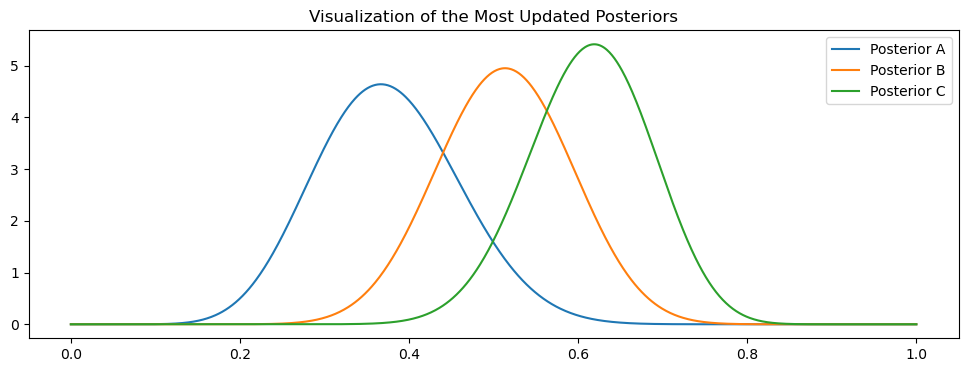

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4)); plt.plot(parameter_domain, dist_A, label="Posterior A");
plt.plot(parameter_domain, dist_B, label="Posterior B");
plt.plot(parameter_domain, dist_C, label="Posterior C");
plt.legend(); plt.title("Visualization of the Most Updated Posteriors")

In [ ]:
# Homework Answer

# The data is the outcome of the binomial simulation(s), 
# and the parameters of the corresponding binomial simulation(s) are updated based on the data
# Alpha is updated to (initialized alpha + total number of success) and
# Beta is updated to (beta + total number of simulation - total number of success)

# The probability of each distribution being picked to be simulated is updated to the 
# probability(theta) that gives the largest pdf in the distribution

# After updating the posterior (and the probability), new distribution(s) to be simulated are picked based on the probability.